## 이론:선형회귀에 대한 이해 / 오차와 COST함수/모델 파라미터 최적화/ 경사하강법/ TF를 이용한 선형회기구현

[ 선형회귀에 대한 이해]
상관수치를 파악할수 있음(EX. 광고비지출에 따른 매출증가량/ 특정요인에따른 집값변화 분석)
    데이터간 어느정도 상관이 있어야함

[오차]랜덤으로 구한 두값 / 데이터중 가장큰거,작은거로 이루어진 직선들은 차원이 많아지면 그래프로 그려서 파악을 하지못함 => 수치화할 필요가 생김
이때 실제 y와 가설로 나온 y값(h)의 차인 y-h를 이용가능함

[오차구하는 종류]오차는 +-모두 발생하니까 절대값으로 구하거나(평균절대값오차), 구한값을 제곱해서 평균으로(평균제곱오차), 혹은 구한값을 제곱평균후 루트(평균제곱근오차) 하는 세가지 방법이 있음: 주로 평균제곱근오차 사용

[COST함수(w,b)]데이터로 추정한 학습모델이 데이터를 얼마나 잘 설명하는가? 
전체데이터에 대한 오차를 의미하는 cost로 정의가능(평균제곱근오차)
cost 낮으면 -> 학습잘된거, cost 높으면 -> 학습잘안된거
우리가 기울기와 w와 y절편b를 구해서 cost를 구해야함!

[모델 파라미터 최적화]즉 선형회기에서는 cost함수가 최소가 되는 w,b를 찾아야함
그런데 w는 여러개일수도, 범위도 +-무한대임..(아까 주가예측에서는 w가 실업률와 이자율 두가지였지만, 지금 보스턴집값에서의 w는 정말다양함) 이걸해결하려고 경향성분석(w에 따른 cost의 변화)을함

[경사하강법]w에 따른 cost의 변화: 각점에서의 기울기를 보면 cost가0일때 기울기도 0이군 이렇게 기울기를 이용해 최적의 w를 찾아가는 방법 **이때 학습률 알파의 개념등장: 알파가 크면 성큼성큼 빠르게 최저지점을 찾아감 하지만 최저를 그냥지나칠수 있음/ 알파가 작으면 조금씩이동하며 최저지점을 찾아감 하지만 이동횟수가 많아지니 속도가 느려짐. ** 최적의 w를 구하면 그값에서 기울기가 거의 0이기 때문에 w가 변화하지 않음. 그때 y=최적의w*x라는 학습모델을 도출  **w의 기울기가 갑자기 떨어지는 구간: 정답에서 멀고 학습이 빠르게 이루어짐 **w의 기울기가 거의변화가 없는구간: 정답에서 가깝고 학습이 천천히 이루어짐

이때 w만 경사하강하면 1차원(b=0으로 가정), w와 b모두 경사하강하면 다차원

## 선형회기 1) 학습데이터 x와 출력값y 정하기 2) 학습모델 정의 H(x)=wx+b 3) 학습방법(cost함수정의 -> 비용최소화 되도록 최적화 -> 경사하강이용해서 w,b추정) 4) 예측 :w,b를 사용해 y값 예측하기

In [1]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


## 1단계 : x와 출력값 y정의
## 2단계 : 학습모델과 cost함수정의

In [2]:
## 1단계 : x와 출력값 y정의
x_data =[1.0,2,3,4]
y_data =[1.1,2.2,3,4.2]


w = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
## error = hypothesis - y
hypothesis = w*x  # 예측값 h는 w와 x를 곱한값
## cost함수정의
cost =tf.reduce_mean(tf.square(hypothesis - y))

In [3]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
sess=tf.compat.v1.Session()

c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:-4})## dict으로 값을 공급함
print(cost)
print(c)

Tensor("Mean:0", shape=(), dtype=float32)
190.7725


w가 -4일때 c값이 190.77이군(에러가 매우크군)

In [4]:
## w값을 바꿔가면서 cost값의 변화를 보자구
c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:-3})## dict으로 값을 공급함
print(c)
c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:-2})## dict으로 값을 공급함
print(c)
c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:-1})## dict으로 값을 공급함
print(c)
c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:0})## dict으로 값을 공급함
print(c)

122.622505
69.4725
31.322498
8.1725


오 w가 0에가가울때 cost가 점점줄었군

In [5]:
##매번 수기로 w값 설정을 바꿀수 없으니 for로 함수만듬
for value in [-4,-3,-2,-1,0,1,2,3,4,5,6]:
    c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:value})
    print(value, c)

-4 190.7725
-3 122.622505
-2 69.4725
-1 31.322498
0 8.1725
1 0.022499986
2 6.8725004
3 28.7225
4 65.5725
5 117.4225
6 184.27249


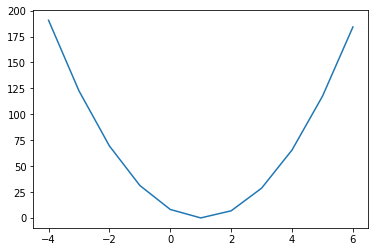

In [6]:
## w값 변화에 따른 cost변화를 그래프로 나타내어보까나
cs = [] ## 함수를 선언하고
for v in [-4,-3,-2,-1,0,1,2,3,4,5,6]:
    c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:v})
    cs.append(c)
plt.plot([-4,-3,-2,-1,0,1,2,3,4,5,6],cs)

0.009212394
501
1.0330330330330337


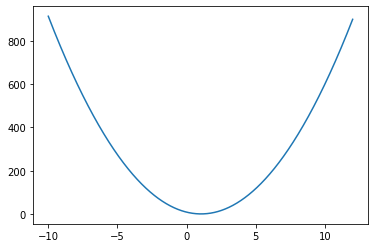

In [7]:
## w값 변화에 따른 cost변화를 그래프로 나타내어보까나(w가 정수가 아니라면)
cs = []
fromto = np.linspace(-10, 12,1000) ## w범위를 -10부터 12사이에 1000개 범위로
for v in fromto:
    c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:v})
    cs.append(c)
plt.plot(fromto, cs)

print(np.array(cs).min())  ## cost가 최소일때값
print(np.array(cs).argmin())## cost가 최소일때 w의 인덱스
print(fromto[np.array(cs).argmin()]) ## cost가 최소일때 w의 값

In [8]:
## w값 변화에 따른 cost변화를 그래프로 나타내어보까나(+-무한대범위: 이제 tf이용)
## tf를 활용한 경사하강법
## 이건 tensorflow의 버전문제로 placeholder가 구현안되서 넣어준거
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

learning_rate = 0.1 ## 학습률 알파를 0.1로 설정했음

## 이제 w가 내부적으로 업데이트 되어야하는 학습파라미터임, 그래서 변수타입을줌
w = tf.Variable(2.0) ## 기울기 초기값을 2.0으로 설정함
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
## 학습모델정의
hypothesis = w*x  # 예측값 h는 w와 x를 곱한값
## error = hypothesis - y
cost =tf.reduce_mean(tf.square(hypothesis - y))

## 모든 w지점에서의 기울기
gradient = tf.reduce_mean((w*x-y)*x)

# w = w - 학습율 알파(learning_rate) * gradient
descent = w- learning_rate*gradient
update = w.assign(descent) ## tf에서 호출시 마다 w가 업데이트됨

In [15]:
### init이 버전충돌로 안되서 이명령어를 적음
## 변수타입 텐서를 초기화 init하기
import tensorflow as tf
init =tf.compat.v1.global_variables_initializer()
sess.run(init)

## 학습데이터를 사용해 w를 업데이트하고
sess.run(update, feed_dict={x:x_data, y:y_data})
## 업데이트이후의 cost와 w를 출력하기
c,w_ = sess.run([cost, w], feed_dict={x:x_data, y:y_data})
print(c, w_)

0.43742207 1.2825


2.0의 w를 cost가 작아지는 방향으로 첫번째업데이트 했을때의  나오는 cost와 w값(w는 2.0에서 1.28로 줄었군)

In [16]:
### 그럼 여러번 반복(업데이트) 해서 변화를 보자구

## 학습데이터를 사용해 w를 업데이트하고
sess.run(update, feed_dict={x:x_data, y:y_data})
## 업데이트이후의 cost와 w를 출력하기
c,w_ = sess.run([cost, w], feed_dict={x:x_data, y:y_data})
print(c, w_)

## 학습데이터를 사용해 w를 업데이트하고
sess.run(update, feed_dict={x:x_data, y:y_data})
## 업데이트이후의 cost와 w를 출력하기
c,w_ = sess.run([cost, w], feed_dict={x:x_data, y:y_data})
print(c, w_)

## 학습데이터를 사용해 w를 업데이트하고
sess.run(update, feed_dict={x:x_data, y:y_data})
## 업데이트이후의 cost와 w를 출력하기
c,w_ = sess.run([cost, w], feed_dict={x:x_data, y:y_data})
print(c, w_)

0.03522947 1.103125
0.01009246 1.0582812
0.008521404 1.0470703


두번째 업데이트에서 cost는 0.03522947 w는 1.103125, 세번째 업데이트에서 cost는 0.01009246  w는 1.0582812
네번째 업데이트에서 cost는 0.008521404  w는 1.0470703  => 업데이트 하면서 cost가 점점주는군

In [22]:
### 이제 반복문으로 10번 업데이트 해보자
sess.run(tf.compat.v1.global_variables_initializer())
for i in range(0,10) :  ## 10번이라 range 10
    ## 학습데이터를 사용해 w를 업데이트하고
    sess.run(update, feed_dict={x:x_data, y:y_data})
## 업데이트이후의 cost와 w를 출력하기
    c,w_ = sess.run([cost, w], feed_dict={x:x_data, y:y_data})
    print(i, c, w_)  # 몇번째 업데이트인가 / cost값이 얼마인가 / 그때 w는 얼마인가

0 0.43742207 1.2825
1 0.03522947 1.103125
2 0.01009246 1.0582812
3 0.008521404 1.0470703
4 0.0084232045 1.0442675
5 0.008417085 1.0435668
6 0.008416693 1.0433917
7 0.008416677 1.043348
8 0.008416675 1.043337
9 0.008416668 1.0433342


In [23]:
### 이제 반복문으로 20번 업데이트 해보자
### init이 버전충돌로 안되서 이명령어를 적음
sess.run(tf.compat.v1.global_variables_initializer())
for i in range(0,20) :  ## 20번이라 range 20
    ## 학습데이터를 사용해 w를 업데이트하고
    sess.run(update, feed_dict={x:x_data, y:y_data})
## 업데이트이후의 cost와 w를 출력하기
    c,w_ = sess.run([cost, w], feed_dict={x:x_data, y:y_data})
    print(i, c, w_)  # 몇번째 업데이트인가 / cost값이 얼마인가 / 그때 w는 얼마인가

0 0.43742207 1.2825
1 0.03522947 1.103125
2 0.01009246 1.0582812
3 0.008521404 1.0470703
4 0.0084232045 1.0442675
5 0.008417085 1.0435668
6 0.008416693 1.0433917
7 0.008416677 1.043348
8 0.008416675 1.043337
9 0.008416668 1.0433342
10 0.008416667 1.0433335
11 0.008416659 1.0433334
12 0.008416668 1.0433333
13 0.008416668 1.0433333
14 0.008416668 1.0433333
15 0.008416668 1.0433333
16 0.008416668 1.0433333
17 0.008416668 1.0433333
18 0.008416668 1.0433333
19 0.008416668 1.0433333


12번째 업데이트 이후로는 cost와 w가 더이상 줄지않음 -> 학습을 계속해도 cost가 낮아지는건 아님

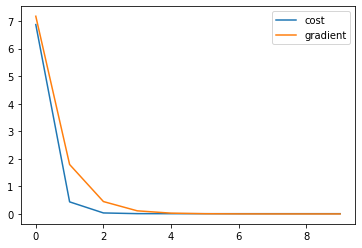

In [30]:
## cost와 gradient의 변화를 그래프로 보자구
sess.run((tf.compat.v1.global_variables_initializer()))
cs = []
gs =[]
for i in range(0, 10):
         _, c, g = sess.run([update,cost,gradient], feed_dict={x: x_data, y: y_data})
         cs.append(c)
         gs.append(g)
plt.plot(cs)
plt.plot(gs)
plt.legend(["cost","gradient"])

In [34]:
## 어느정도후에 학습(업데이트)가 멈추도록 지정해주기(계속해봤자 일정 업데이트이후는 동일한값이니까)
### init이 버전충돌로 안되서 이명령어를 적음
sess.run(tf.compat.v1.global_variables_initializer())

oldc = 1000  ## 이전 cost의 값
for i in range(0,1000):  ## 내가 1000번 업데이트 하라고 했지만 실제 작동하면 for조건때문에 결과가 6번에서 멈춤
    _, c, g = sess.run([update,cost,gradient], feed_dict={x: x_data, y: y_data})
    print(i,c)
    if oldc - c < 0.00001 : break  ## 이전 cost와 이번 새로운 cost의 차이가 0.00001보다 작으면 멈추기
    oldc = c
    

0 6.8725004
1 0.43742207
2 0.03522947
3 0.01009246
4 0.008521404
5 0.0084232045
6 0.008417085


<tf.Variable 'Variable:0' shape=() dtype=float32_ref>


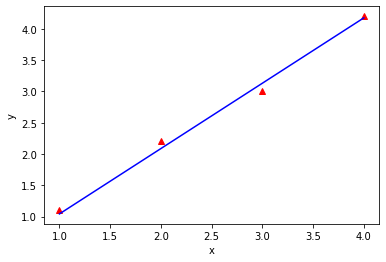

In [35]:
# 학습데이터 표시하기
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_data, y_data, 'r^')  ## 점을 빨간색 ^로 그려라

##  업데이트된 w_ 를가지고 추정해서 학습데이터를 선으로 이은거
w_ = sess.run(w)
print(w)
plt.plot(x_data, np.array(x_data)*w_, 'b')

[분석1- w초기값에 따른 cost변화] 최적의 w가 1근처이기때문에 가까운 w=1.2의 cost는 거의 바로 수렴됨 ( 멀수록 루프를 더 돌고 수렴함, 빨간색은 8번하고 수렴하게됨)

In [66]:
## 이건 tensorflow의 버전문제로 placeholder가 구현안되서 넣어준거
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


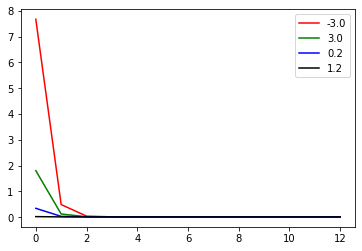

In [70]:
## w초기값에 따른 cost변화

x_data =[1.0,2,3,4]
y_data =[1.1,2.2,3,4.2]


## 이제 w가 내부적으로 업데이트 되어야하는 학습파라미터임, 그래서 변수타입을줌
## 기울기 초기값을 2.0 뿐만아니라 여러개로 줍니다.. ws
ws = [-3.0,3.0,0.2,1.2]
colors = ["r","g","b","k"]


for i in range(4) :
    w = tf.Variable(ws[i])
    x = tf.placeholder(tf.float32)
    y = tf.placeholder(tf.float32)
## 학습모델정의
    hypothesis = w*x  # 예측값 h는 w와 x를 곱한값
## error = hypothesis - y
    cost =tf.reduce_mean(tf.square(hypothesis - y))
## 학습률 알파를 0.1로 설정했음    
    learning_rate = 0.1 
## 모든 w지점에서의 기울기
    gradient = tf.reduce_mean((w*x-y)*x)
# w = w - 학습율 알파(learning_rate) * gradient
    descent = w - learning_rate*gradient
    update = w.assign(descent) ## tf에서 호출시 마다 w가 업데이트됨
    
  
    sess.run(tf.global_variables_initializer())

    cs = []
    for step in range(13):  ## 학습 횟수를 13으로 줌
        sess.run(update, feed_dict={x: x_data, y: y_data})
        c = sess.run(cost, feed_dict={x: x_data, y: y_data})
        cs.append(c)
    plt.plot(cs, colors[i])
plt.legend(ws)
    

최적의 w가 1근처이기때문에 가까운 w=1.2의 cost는 거의 바로 수렴됨 ( 멀수록 루프를 더 돌고 수렴함, 빨간색은 8번하고 수렴하게됨)

[분석2- 학습률 알파변화에 따른 cost변화] 너무크면 몇번의 학습후 바로수렴, 너무작으면 수렴하지못함

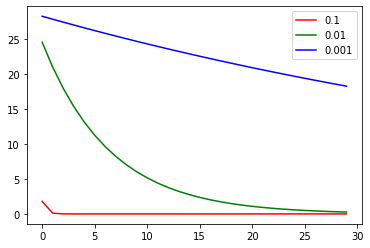

In [72]:
## 학습률 알파변화 따른 cost변화

x_data =[1.0,2,3,4]
y_data =[1.1,2.2,3,4.2]


## 이제 w가 내부적으로 업데이트 되어야하는 학습파라미터임, 그래서 변수타입을줌
## 학습율을 여러개로 줍니다..irs
Irs = [0.1,0.01,0.001]
colors = ["r","g","b"]


for i in range(3) : ## 3개의 학습율중에
    w = tf.Variable(3.0)  ## 이번에 w는 고정
    x = tf.placeholder(tf.float32)
    y = tf.placeholder(tf.float32)
## 학습모델정의
    hypothesis = w*x  # 예측값 h는 w와 x를 곱한값
## error = hypothesis - y
    cost =tf.reduce_mean(tf.square(hypothesis - y))
## 학습률 알파를 여러개 irs로 설정했음    
    learning_rate = Irs[i] 
## 모든 w지점에서의 기울기
    gradient = tf.reduce_mean((w*x-y)*x)
# w = w - 학습율 알파(learning_rate) * gradient
    descent = w - learning_rate*gradient
    update = w.assign(descent) ## tf에서 호출시 마다 w가 업데이트됨
    
  
    sess.run(tf.global_variables_initializer())

    cs = []
    for step in range(30):  ## 학습횟수를 30으로 줌
        sess.run(update, feed_dict={x: x_data, y: y_data})
        c = sess.run(cost, feed_dict={x: x_data, y: y_data})
        cs.append(c)
    plt.plot(cs, colors[i])
plt.legend(Irs)
    

학습율이 큰 빨간선은  빠르게 수렴
학습율이 0.01인 초록선은 느리지만 완만한 학습곡선을 그리며 수렴함
학습율이 작은 파란선은 꾸준히 cost가 작아지지만, 학습수가 30일때 수렴못함

[분석3- 학습횟수 변화에따른 cost변화] 학습율이 적어도 완만한 학습곡선을 그리며 수렴함. 학습률이 작으면 느리게 수렴하니까 학습을 많이해야하고, 학습율이 빠른함수는 빠르게 수렴하니까 최저점을 지날수 있음

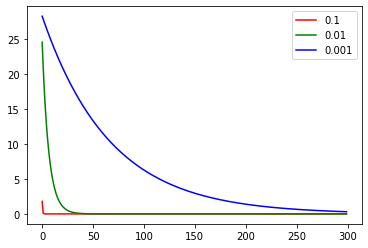

In [85]:
## 학습률 알파변화 따른 cost변화

x_data =[1.0,2,3,4]
y_data =[1.1,2.2,3,4.2]


## 이제 w가 내부적으로 업데이트 되어야하는 학습파라미터임, 그래서 변수타입을줌
## 학습율을 여러개로 줍니다..irs
Irs = [0.1,0.01,0.001]
colors = ["r","g","b"]


for i in range(3) : ## 3개의 학습율중에
    w = tf.Variable(3.0)  ## 이번에 w는 고정
    x = tf.placeholder(tf.float32)
    y = tf.placeholder(tf.float32)
## 학습모델정의
    hypothesis = w*x  # 예측값 h는 w와 x를 곱한값
## error = hypothesis - y
    cost =tf.reduce_mean(tf.square(hypothesis - y))
## 학습률 알파를 여러개 irs로 설정했음    
    learning_rate = Irs[i] 
## 모든 w지점에서의 기울기
    gradient = tf.reduce_mean((w*x-y)*x)
# w = w - 학습율 알파(learning_rate) * gradient
    descent = w - learning_rate*gradient
    update = w.assign(descent) ## tf에서 호출시 마다 w가 업데이트됨
    
  
    sess.run(tf.global_variables_initializer())

    cs = []
    for step in range(300):  ## 학습횟수를 30으로 줌
        sess.run(update, feed_dict={x: x_data, y: y_data})
        c = sess.run(cost, feed_dict={x: x_data, y: y_data})
        cs.append(c)
    plt.plot(cs, colors[i])
plt.legend(Irs)
    

학습율이 적어도 완만한 학습곡선을 그리며 수렴함. 학습률이 작으면 느리게 수렴하니까 학습을 많이해야하고, 학습율이 빠른함수는 빠르게 수렴하니까 최저점을 지날수 있음

tf함수를 이용해 cost와 학습율만 정의해서 구현가능_gradientdecesentOptimizer

In [138]:
## 학습률 알파변화 따른 cost변화
x_data =[1.0,2,3,4]
y_data =[1.1,2.2,3,4.2]

w = tf.Variable(0.0)
b = tf.Variable(0.0)
hypothesis = w*x_data+b

cost =tf.reduce_mean(tf.square(hypothesis - y))
learning_rate = 0.1

update = tf.compat.v1.train.GradientDescentOptimizer(learning_rate, use_locking=False)

sess.run(tf.global_variables_initializer())

cs = [] 
for step in range(100):## 학습횟수를 100으로 줌
    c, _ = sess.run([cost,update])
    cs.append(c)
w_ ,b_= sess.run([w, b])
print(w_,b_,c)
plt.plot(cs)

AttributeError: module 'tensorflow_core.compat.v1.compat' has no attribute 'v1'

In [ ]:
init =tf.compat.v1.global_variables_initializer()